# Density-Temperature Plane

Figure 3.3 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot of regions in the density-temperature plane where the pressure is dominated by radiation pressure,
ideal gas pressure, non-relativistic degeneracy pressure, and relativistic degeneracy pressure.
A gas of pure hydrogen is assumed.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig3_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Equation of Stage Boundaries

Three equation of state boundaries to plot in the $\rho-$T plane:
 * radiation and ideal gas pressure
 * ideal gas and non-relativistic degeneracy pressure
 * non-relativistic and relativisitic degeneracy pressure
 
The critical density between radiation and ideal gas pressure for ionized hydrogen is Equation 3.81:

$\rho_\textrm{r-i} = 0.0455\,\textrm{g cm}^{-3}\left( \frac{T}{10^7\,\textrm{K}} \right)^3$

The critical density between ideal gas and non-relativistic degeneracy pressure for ionized hydrogen is 
Equation 3.79:

$\rho_\textrm{i-d} = 2130\,\textrm{g cm}^{-3} \left( \frac{T}{10^7\,\textrm{K}} \right)^{3/2}$



In [3]:
# log10 Temperature range

logTmin = 4.0
logTmax = 9.0

T = 10.0**np.linspace(logTmin,logTmax,101)

# critical density between radiation and ideal gas pressure

rhoRI = 0.04550*(T/1.0e7)**3

# critical density between ideal gas and non-relativistic degeneracy pressure

rhoID = 2133.0*(T/1.0e7)**1.5

# critical density between non-relativistic and relativistic degeneracy

rhoRD = 1.0e6


### Figure 3.3

Plot the boundary between radiation and ideal gas pressure as a dotted line, ideal gas and degeneracy as
a solid line, and relativistic and non-relativistic degeneracy as a dashed line.


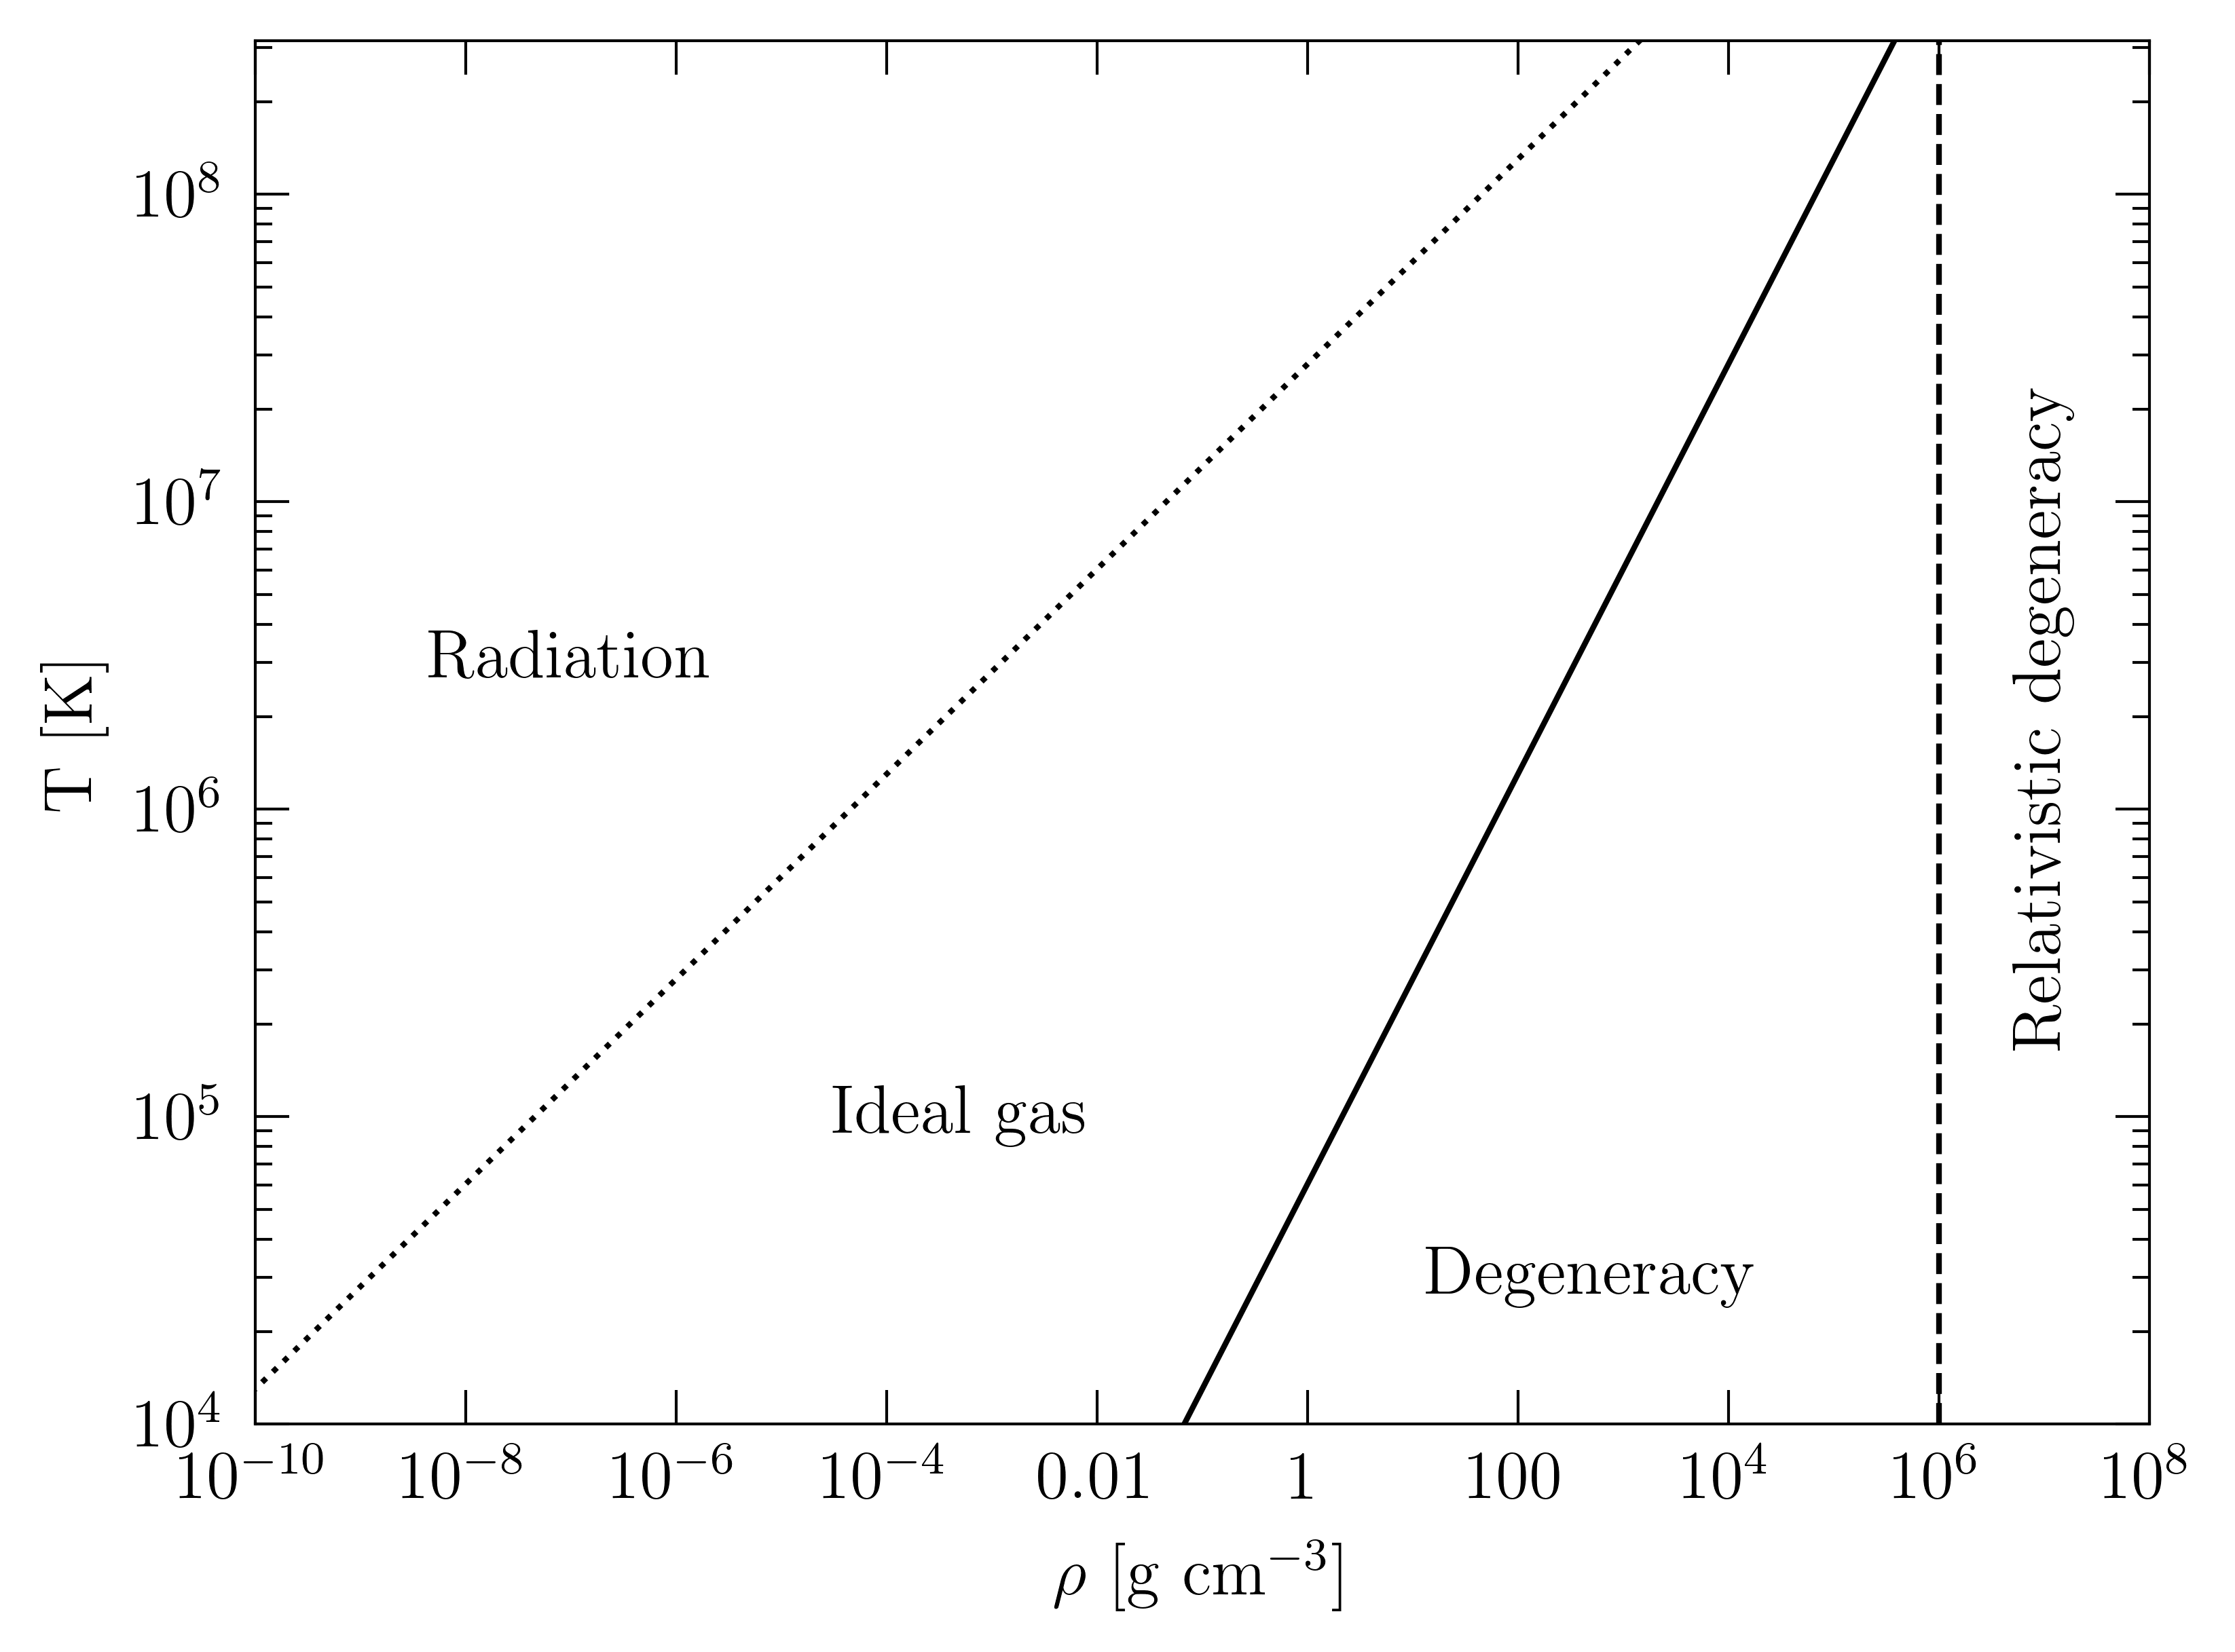

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(1.0e-10,1.0e8)
ax.set_xscale('log')
ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]',fontsize=axisFontSize)
ax.set_xticks([1.0e-10,1.0e-8,1.0e-6,1.0e-4,0.01,1,100,1.0e4,1.0e6,1.0e8])
ax.set_xticklabels([r'10$^{-10}$',r'10$^{-8}$',r'10$^{-6}$',r'10$^{-4}$',r'0.01',
                    '1','100',r'10$^4$',r'10$^6$',r'10$^8$'])

minT = 10.0**logTmin
maxT = 10.0**8.5
ax.set_ylim(minT,maxT)
ax.set_yscale('log')
ax.set_ylabel(r'T [K]',fontsize=axisFontSize)

ax.plot(rhoRI,T,':',color='black',lw=1,zorder=10)
ax.text(1.0e-7,3.0e6,'Radiation',va='center',ha='center',fontsize=axisFontSize)

ax.plot(rhoID,T,'-',color='black',lw=1,zorder=10)
ax.text(5e-4,1.0e5,r'Ideal gas',ha='center',va='center',fontsize=axisFontSize)

ax.vlines(rhoRD,minT,maxT,ls=['--'],color=['black'],lw=1,zorder=10)
ax.text(500,3.0e4,r'Degeneracy',ha='center',va='center',fontsize=axisFontSize)
ax.text(1.0e7,2.0e6,r'Relativistic degeneracy',ha='center',va='center',rotation=90,fontsize=axisFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')